Primal-dual interior-point method

Dependencies: `jax`, `numpy`, `matplotlib`

In [1]:
import numpy as np
import jax.numpy as jnp

import json as js

import math

import sys
sys.path.append(r"./src")
from src.impl import IPM
from src.impl import myplot

Define your own Objective Functions and Inequality Constrains like this:

```python
def f(x):
    return your_function(x)
def cons(x):
    return [c1(x),c2(x),...]
```

* use jnp instead of np in function definitions 

Define Equality Constraints like this:

``` python
Ax=b
```

choose your own $x_0$, $\lambda$, $\gamma$, $\epsilon_{feas}$, $\epsilon$, $\beta$, $\tau$ , then call : IPM(f,cons,A,b,x0,lmd=0.1,gamma=2,epsf=1e-4,eps=1e-4,beta=0.5,tau=0.01)

* only the first five parameters are necessary

we use Quadratic function here as an example:

$f(x)=x_0^2+x_1^2$

\begin{equation*}
\begin{split}
&\min_{x} \,\, f(x)\\
&s.t.\quad  \left\{\begin{array}{lc}
(x_0+1)^2+x_1^2-4 \leq 0\\
(x_0-1)^2+x_1^2-4 \leq 0\\
x_0-x_1 = 0\\
\end{array}\right.
\end{split}
\end{equation*}

the exact solution is $x_0=0\,x_1=0$

In [2]:
#the quadratic function
def f1(x):
    return x[0]**2+x[1]**2
#constrains
def cons1(x):
    return [(x[0]+1)**2+x[1]**2-4,(x[0]-1)**2+x[1]**2-4]
A=np.array([[1.,-1.]])
b=np.array([0.])
x0=np.array([0., 1.])

then call IPM with $\gamma=2$

In [3]:
[x,hashcode]=IPM(f1,cons1,A,b,x0,0.1,2.)
print(x)

iter:  1 x =  [-0.26653848 -0.25653848] f=  0.13685475740242622 t=  1
iter:  2 x =  [-0.04338734 -0.04328734] f=  0.0037562545118536347 t=  1.9117785520730344
iter:  3 x =  [-0.00194655 -0.00194555] f=  7.574211419501193e-06 t=  4.585111162170186
iter:  4 x =  [-6.17707994e-05 -6.17607994e-05] f=  7.630028012005306e-09 t=  9.004787825186078
iter:  5 x =  [-1.33552314e-06 -1.33542314e-06] f=  3.566977010785929e-12 t=  17.830141371345146
iter:  6 x =  [-2.16425845e-08 -2.16415845e-08] f=  9.367596456615878e-16 t=  35.30720595556074
iter:  7 x =  [-3.84017069e-10 -3.84007069e-10] f=  2.949305386641977e-19 t=  69.91525930924232
iter:  8 x =  [-5.35359447e-12 -5.35349470e-12] f=  5.732087927687148e-23 t=  138.44605803809463
iter:  9 x =  [-6.42333374e-14 -6.42322208e-14] f=  8.251699815731887e-27 t=  274.15060997642496
iter:  10 x =  [-7.07036543e-16 -7.07153570e-16] f=  9.999668443945487e-31 t=  542.8724950028217
iter:  11 x =  [-7.42490054e-18 -7.44784082e-18] f=  1.1059948092611149e-34 t

Visualize the running process

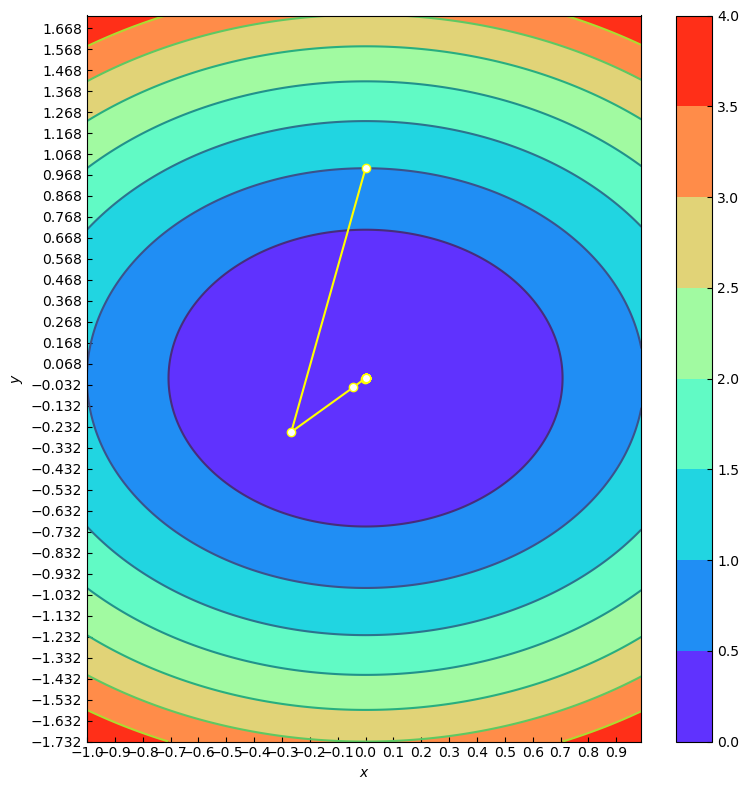

In [4]:
def f1_proxy(x,y):
    return f1(np.array([x,y]))
myplot(f1_proxy,hashcode,-1,1,-3**0.5,3**0.5)

if we change $\gamma$ to 1000

In [5]:
[x,hashcode]=IPM(f1,cons1,A,b,x0,0.1,1000.)
print(x)

iter:  1 x =  [-0.26653848 -0.25653848] f=  0.13685475740242622 t=  1
iter:  2 x =  [-0.14168554 -0.13998096] f=  0.039669460224669884 t=  955.8892760365172
iter:  3 x =  [-0.02226908 -0.02207458] f=  0.0009831993987449651 t=  8265.181997655658
iter:  4 x =  [-0.00043136 -0.00042942] f=  3.704766637938244e-07 t=  54799.31922376495
[-4.41834668e-06 -4.39889665e-06]


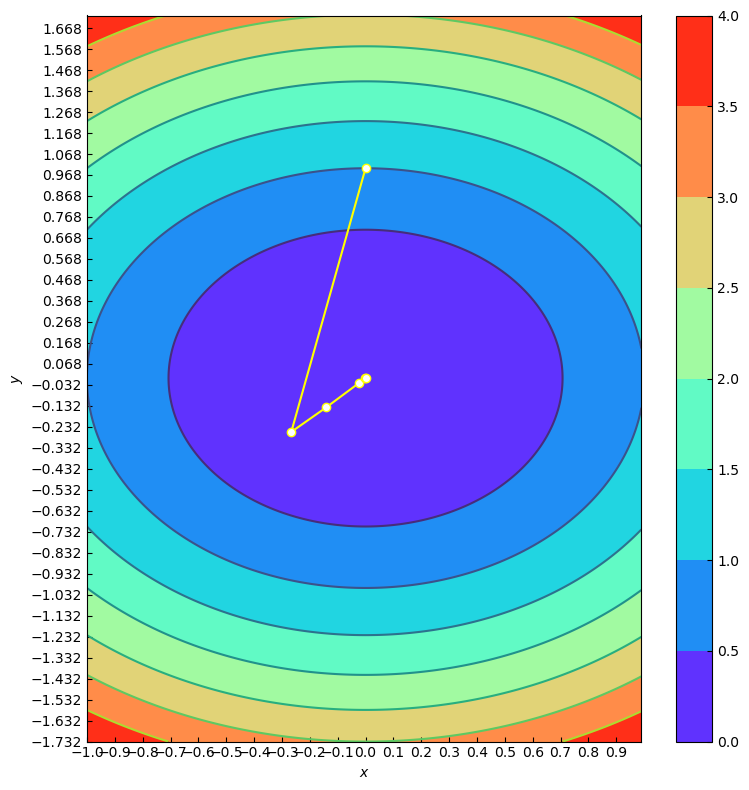

In [6]:
myplot(f1_proxy,hashcode,-1,1,-3**0.5,3**0.5)

if we change x0 to [-0.4,-1.4]

In [7]:
x0=np.array([-0.4, -1.4])
[x,hashcode]=IPM(f1,cons1,A,b,x0,0.1,2.)
print(x)

iter:  1 x =  [ 0.19380606 -0.31119394] f=  0.13440245726264896 t=  1
iter:  2 x =  [0.01019389 0.00514389] f=  0.00013037488425168305 t=  2.4307317984760632
iter:  3 x =  [0.00045033 0.00039983] f=  3.626667652628957e-07 t=  5.26866358251425
iter:  4 x =  [1.30936735e-05 1.25886735e-05] f=  3.299189838813042e-10 t=  10.421170973142473
iter:  5 x =  [2.63102921e-07 2.58052921e-07] f=  1.3581445731415675e-13 t=  20.635894538168593
iter:  6 x =  [4.20408853e-09 4.15358853e-09] f=  3.492665801805902e-17 t=  40.86315721244484
iter:  7 x =  [7.02294413e-11 6.97244411e-11] f=  9.79367211689033e-21 t=  80.91714299448194
iter:  8 x =  [9.41699524e-13 9.36649959e-13] f=  1.7641111386567276e-24 t=  160.23196632570637
iter:  9 x =  [1.10438128e-14 1.09931481e-14] f=  2.428151080118159e-28 t=  317.29102242714134
iter:  10 x =  [1.20010671e-16 1.19563457e-16] f=  2.8697981446503706e-32 t=  628.299054311171
iter:  11 x =  [1.25333793e-18 1.26796438e-18] f=  3.1785896245963155e-36 t=  1244.1565431904

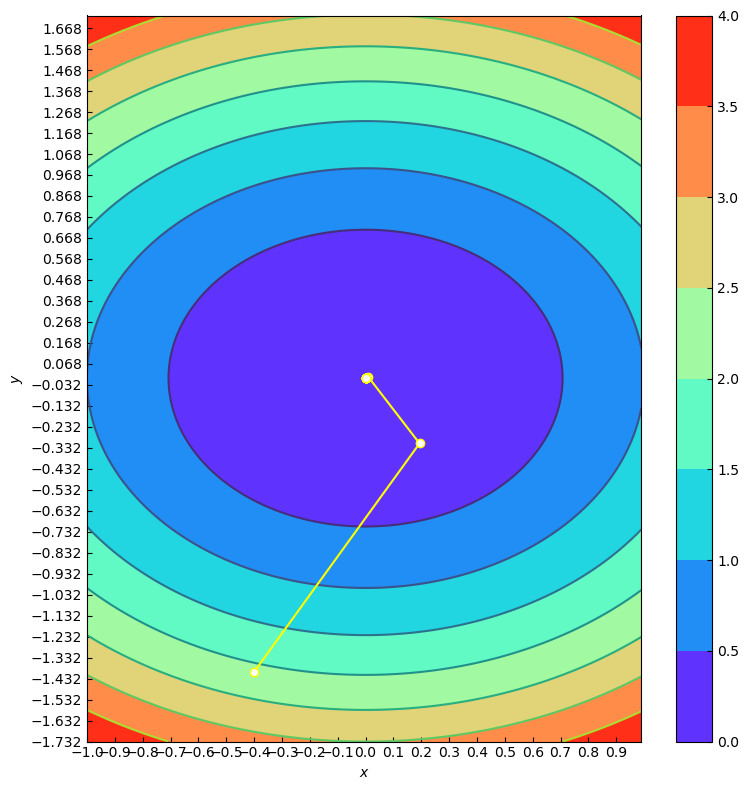

In [8]:
myplot(f1_proxy,hashcode,-1,1,-3**0.5,3**0.5)

another example:

$f(u,v)=log(u)+log(v)$

\begin{equation*}
\begin{split}
&\max_{x} \,\, f(u,v)\\
&s.t.\quad  \left\{\begin{array}{lc}
 (u-2)^2+(v-2)^2\leq 1\\
u+v=3\\
\end{array}\right.
\end{split}
\end{equation*}

exact solution is u=1.5, v=1.5


In [9]:
def f2(x):
    return -jnp.log(x[0])-jnp.log(x[1])
def cons2(x):
    return [(x[0]-2)**2+(x[1]-2)**2-1]
A=np.array([[1.,1.]])
b=np.array([3.])
x0=np.array([2., 2.5])
[x,hashcode]=IPM(f2,cons2,A,b,x0,0.1,2)
print(x)

iter:  1 x =  [2.36381624 1.39368376] f=  -1.1922278 t=  1
iter:  2 x =  [1.80018757 1.20738743] f=  -0.7763498 t=  7.104646185562626
iter:  3 x =  [1.63167428 1.36956497] f=  -0.8040998 t=  78.3683994478324
iter:  4 x =  [1.50344935 1.49656305] f=  -0.81093323 t=  5570.030221045357
[1.50003675 1.49996337]


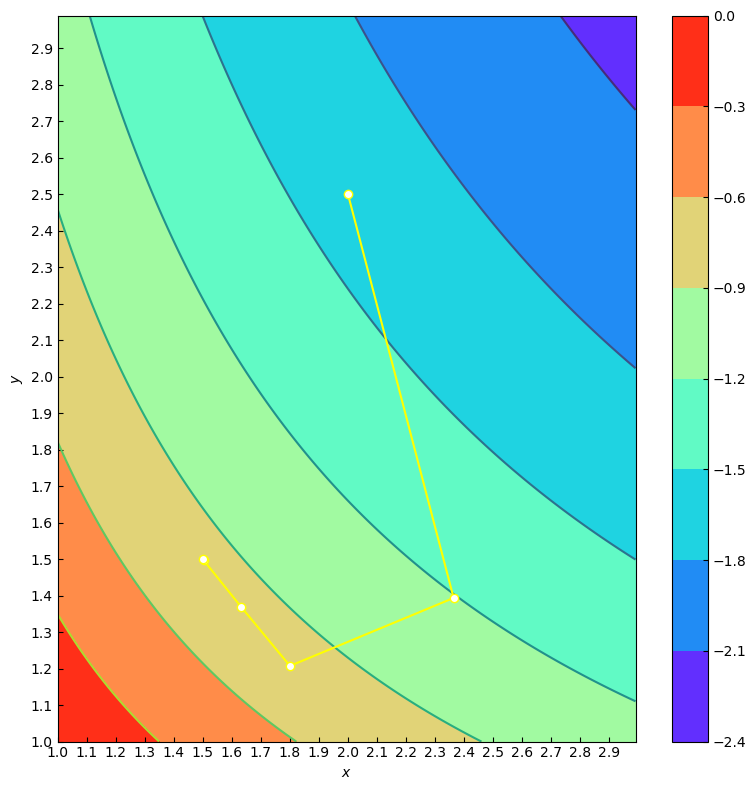

In [10]:
def f2_proxy(x,y):
    return f2(np.array([x,y]))
myplot(f2_proxy,hashcode,1,3,1,3)

if we change $\gamma$ to 1000

In [11]:
[x,hashcode]=IPM(f2,cons2,A,b,x0,0.1,1000.)
print(x)

iter:  1 x =  [2.36381624 1.39368376] f=  -1.1922278 t=  1
iter:  2 x =  [1.91010538 1.15090238] f=  -0.7877047 t=  3552.3230927813133
iter:  3 x =  [1.77483571 1.26322328] f=  -0.8073745 t=  655549.8899762549
iter:  4 x =  [1.60247608 1.41100208] f=  -0.81585014 t=  43699797.500678174
iter:  5 x =  [1.50543229 1.49529249] f=  -0.81140196 t=  3587929755.5820913
[1.50005203 1.49995522]


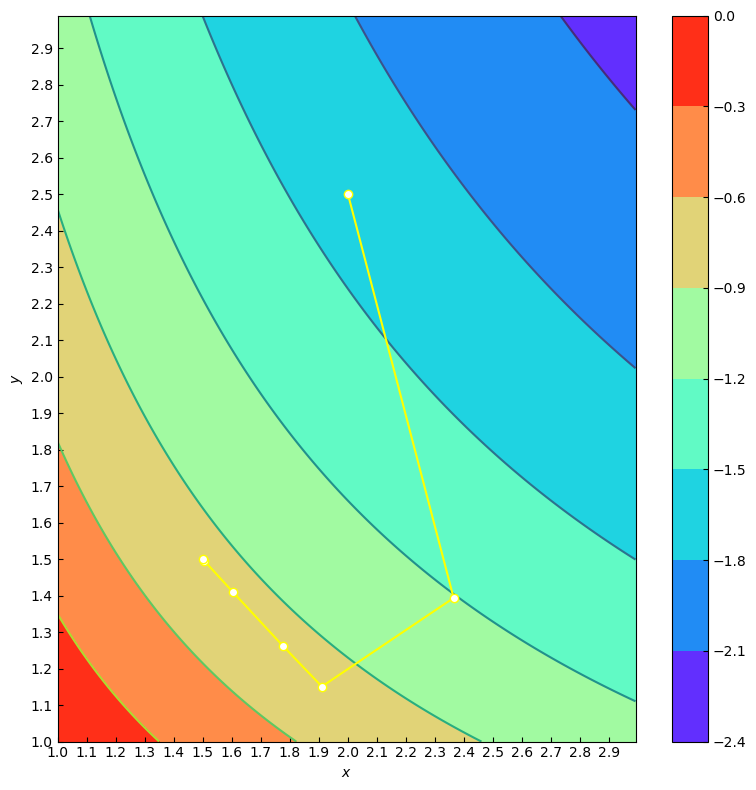

In [12]:
myplot(f2_proxy,hashcode,1,3,1,3)

if we change x to [3,1.9]

In [13]:
x0=[3,1.9]
[x,hashcode]=IPM(f2,cons2,A,b,x0,0.1,2.)
print(x)

iter:  1 x =  [1.81863471 2.61111529] f=  -1.5578635 t=  1
iter:  2 x =  [1.34103039 2.14826658] f=  -1.0580995 t=  8.989163044201572
iter:  3 x =  [1.491885   1.65149979] f=  -0.9017242 t=  981.3542080423553
iter:  4 x =  [1.50669565 1.4947382 ] f=  -0.81187 t=  86019.5902454402
[1.50006184 1.4999525 ]


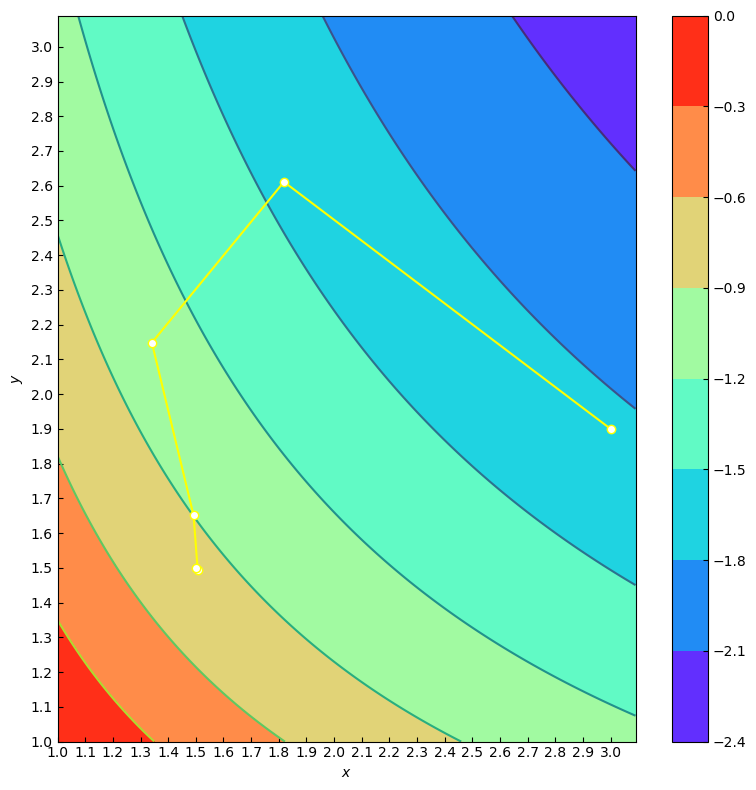

In [14]:
myplot(f2_proxy,hashcode,1,3.1,1,3.1)